# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib
!pip install opencv-python

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/opt/homebrew/lib/python3.11/site-packages/packaging/requirements.py", line 36, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/homebrew/lib/python3.11/site-packages/packaging/_parser.py", line 62, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/homebrew/lib/python3.11/site-packages/packaging/_parser.py", line 80, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
                                   ^^^^^^^^^^^^^^^^^^^^^

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [ ]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                            ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                            ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                            ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                            ) 

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        print(results.left_hand_landmarks)
        # print(image)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1739946673.086244  397294 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Max
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1739946673.166845  397733 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946673.180534  397732 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946673.182013  397732 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946673.182209  397728 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946673.182224  397735 inference_feedback_manager.cc:114] Feedback manager requires a

<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None


W0000 00:00:1739946673.326918  397732 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class 'mediapipe.python.solution_base.SolutionOutputs'>
None
<class '

KeyboardInterrupt: 

: 

In [12]:
print(results.face_landmarks.landmark)

[x: 0.547803879
y: 0.775097549
z: -0.0249125306
, x: 0.545153618
y: 0.723573565
z: -0.0450554341
, x: 0.545866
y: 0.740528047
z: -0.0249876082
, x: 0.536006153
y: 0.673370123
z: -0.0329421
, x: 0.544576108
y: 0.707143366
z: -0.0475184508
, x: 0.54375422
y: 0.686606467
z: -0.0437706597
, x: 0.541924953
y: 0.639475822
z: -0.0197840333
, x: 0.483938962
y: 0.643326223
z: 0.010832049
, x: 0.54100728
y: 0.604973316
z: -0.0129749635
, x: 0.54055196
y: 0.585008442
z: -0.013732505
, x: 0.538458
y: 0.517535388
z: -0.00226490339
, x: 0.548180163
y: 0.782825708
z: -0.023770228
, x: 0.548346102
y: 0.788427711
z: -0.0212233681
, x: 0.548321724
y: 0.790357292
z: -0.0177410487
, x: 0.549059033
y: 0.795557201
z: -0.0177197214
, x: 0.549338281
y: 0.801590145
z: -0.0194946546
, x: 0.549607933
y: 0.809729397
z: -0.0219590515
, x: 0.549891114
y: 0.819299161
z: -0.0218371227
, x: 0.550171435
y: 0.838624418
z: -0.015746545
, x: 0.545400679
y: 0.732320607
z: -0.0410549082
, x: 0.536832273
y: 0.732002258
z: -0

In [13]:
len(results.face_landmarks.landmark)

468

In [14]:
results

mediapipe.python.solution_base.SolutionOutputs

In [15]:
draw_landmarks(frame, results)

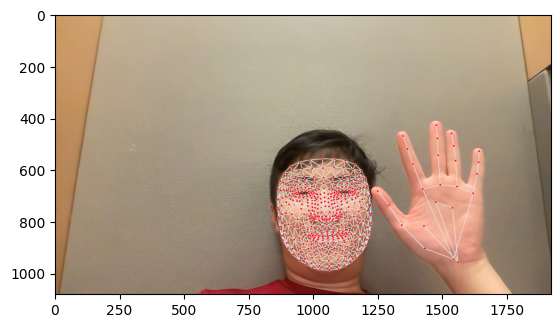

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [18]:
results.pose_landmarks.landmark

[x: 0.553491
y: 0.729087591
z: -0.88525939
visibility: 0.998619914
, x: 0.571321309
y: 0.659738183
z: -0.805629134
visibility: 0.999087453
, x: 0.584153473
y: 0.660328031
z: -0.805779278
visibility: 0.999234915
, x: 0.598129
y: 0.662052512
z: -0.805579126
visibility: 0.99933511
, x: 0.526229084
y: 0.661857784
z: -0.817723155
visibility: 0.998353601
, x: 0.508564532
y: 0.664111137
z: -0.817151725
visibility: 0.998041034
, x: 0.492537796
y: 0.667598844
z: -0.817566097
visibility: 0.997455239
, x: 0.615949094
y: 0.691570401
z: -0.376785368
visibility: 0.999561608
, x: 0.464867562
y: 0.711917222
z: -0.436662167
visibility: 0.99821794
, x: 0.581567585
y: 0.809134841
z: -0.728410125
visibility: 0.998877168
, x: 0.524720907
y: 0.812695265
z: -0.744071245
visibility: 0.998084366
, x: 0.742928207
y: 1.05119312
z: -0.235798925
visibility: 0.995758295
, x: 0.360054523
y: 1.06812143
z: -0.226327151
visibility: 0.902559876
, x: 0.929292798
y: 1.43138909
z: -0.993402123
visibility: 0.905044
, x: 0.2

In [19]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [20]:
len(pose)

33

In [21]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132) # If not just use the shape of the keypoints for pose
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [22]:
len(results.face_landmarks.landmark)

468

In [23]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [9]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [10]:
extract_keypoints(results)[:-10] # Should extract out rh

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
extract_keypoints(results)[:10] # Should extract out pose

array([ 0.553491  ,  0.72908759, -0.88525939,  0.99861991,  0.57132131,
        0.65973818, -0.80562913,  0.99908745,  0.58415347,  0.66032803])

In [28]:
result_test = extract_keypoints(results)

In [120]:
result_test

array([ 0.53422439,  0.7323274 , -0.8708638 , ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
468*3+33*4+21*3+21*3 # The shape of the np array to be fed into the LSTM

1662

In [ ]:
np.save('0', result_test) # Saving each result as a numpy array in file directory

In [ ]:
np.load('0.npy') # Loading the numpy array

array([ 0.53422439,  0.7323274 , -0.8708638 , ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [7]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
# 30 frames would be used to detect the action
# 30 * 1662 keypoints data to detect the action
sequence_length = 30

In [ ]:
# Create folders to store the data for each action sequence
# Each folder will have 30 frames of data
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except Exception as e:
            print(e)

# 5. Collect Keypoint Values for Training and Testing

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait logic (so that we can take a break before recollecting data)
                # Display text to give instructions and state
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1739946597.444043  394640 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Max
W0000 00:00:1739946597.522325  395693 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946597.536218  395696 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946597.537632  395699 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946597.537963  395694 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946597.538225  395693 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

NameError: name 'actions' is not defined

In [33]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [40]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 MB 26.8 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 31.0 MB/s eta 0:00:00MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 35.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 34.2 MB/s eta 0:00:00
Using cached Markdown-3.7-py3-none-any.whl (106 kB)
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Attempting uninstall: ml-dtypes
    Found exis

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [42]:
# Create labels for action for which model has to predict
label_map = {label:num for num, label in enumerate(actions)}

In [43]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [44]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [50]:
sequences[0]

[array([ 0.55052215,  0.68871677, -0.87121713, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.55743027,  0.70733964, -0.90180045, ...,  0.44074404,
         0.55442441, -0.00776295]),
 array([ 0.56014657,  0.71715665, -0.90107018, ...,  0.44658056,
         0.56445163, -0.01194383]),
 array([ 0.56091553,  0.72181231, -0.88690072, ...,  0.44946566,
         0.56518722, -0.0128911 ]),
 array([ 0.56158906,  0.72383887, -0.91879457, ...,  0.43820992,
         0.53503883, -0.01764078]),
 array([ 0.56176275,  0.72465706, -0.98277313, ...,  0.37634599,
         0.41416875, -0.0234436 ]),
 array([ 0.56169343,  0.72361743, -0.99568331, ...,  0.27041644,
         0.29327774, -0.03682637]),
 array([ 0.56177026,  0.72321481, -1.14487946, ...,  0.19914426,
         0.23731388, -0.04249781]),
 array([ 0.56212944,  0.72428733, -1.09930205, ...,  0.15556282,
         0.22432798, -0.05209328]),
 array([ 0.56208891,  0.72685319, -1.17716801, ...,  0.1516459 ,
         0.22701389, -0.04

In [51]:
np.array(sequences).shape

(90, 30, 1662)

In [52]:
np.array(labels).shape

(90,)

In [56]:
X = np.array(sequences) # Form feature set

In [57]:
X.shape

(90, 30, 1662)

In [58]:
y = to_categorical(labels).astype(int) # One hot encode the labels to be predicted

In [ ]:
y # Converted sequence of labels to a one hot encoding representation

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [62]:
X_train.shape

(85, 30, 1662)

In [61]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [13]:
from tensorflow.keras.models import Sequential
# LSTM allows us to perform temporal component for NN for action detection
# Dense fully connected layer
from tensorflow.keras.layers import LSTM, Dense
# TensorBoard webapp to allow us to monitor NN trained
from tensorflow.keras.callbacks import TensorBoard

In [14]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [15]:
# Creating a sequential NN
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu')) # return_sequences set to False because the next layer is a dense layer
# Dense layer - fully connected layers
model.add(Dense(64, activation='relu')) # 64 dense layer
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
actions.shape[0] # 3 actions

3

In [71]:
res = [.7, 0.2, 0.1]

In [ ]:
actions[np.argmax(res)] # Allows you to find the maximum value in the array

'hello'

In [90]:
# We use categorical_corssentropy because we are doing a multiclass classification model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
# Can visualise training using TensorBoard
# Go into the log folder open a cmd prompt and key in "tensorboard --logdir=."

In [79]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - categorical_accuracy: 0.7924 - loss: 3.9128 
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.4443 - loss: 10.8212
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.2642 - loss: 4.8174
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3190 - loss: 10.1032
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.2858 - loss: 2.6138
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.4892 - loss: 4.8625
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.4265 - loss: 3.6206
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.3581 - loss: 4.3719
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - categorical_accuracy: 0.3952 - loss: 7.5023
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.2818 - loss: 6.3223
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [80]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions

In [16]:
res = model.predict(X_test)

NameError: name 'X_test' is not defined

In [ ]:
res[0] # The values are the probability of predicting a class

array([9.9050373e-01, 6.4515837e-07, 9.4956942e-03], dtype=float32)

In [ ]:
actions[np.argmax(res[4])] # What the model predicts based for the test row

'hello'

In [ ]:
actions[np.argmax(y_test[4])] # What the actual label is for that test row

'hello'

# 9. Save Weights

In [86]:
model.save('action.h5')

In [87]:
del model

In [17]:
# Before this, need to create model above and compile it before loading the saved weights
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [22]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [23]:
yhat = model.predict(X_test)

NameError: name 'X_test' is not defined

In [24]:
# Convert predictions from one-hot encoding to categorical labels
# [1,0,0] -> 0
# [0,1,0] -> 1
# [0,0,1] -> 2
ytrue = np.argmax(y_test, axis=1).tolist() 
yhat = np.argmax(yhat, axis=1).tolist()

NameError: name 'y_test' is not defined

In [25]:
multilabel_confusion_matrix(ytrue, yhat)

NameError: name 'ytrue' is not defined

In [96]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [19]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [18]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'res' is not defined

<Figure size 1800x1800 with 0 Axes>

In [19]:
sequence.reverse()

NameError: name 'sequence' is not defined

In [104]:
len(sequence)

TypeError: object of type 'int' has no len()

In [51]:
sequence.append('def')

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5 # Render results only when above threshold

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:] # Grab the last 30 frames for prediction
        
        # Run prediction only when sequence has hit 30 frames otherwise not enough frames
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0] # Expand to fit to model dimension requirement
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
        #3. Visualisation logic
            # Next line stabilises by ensuring action must be held at least 10 frames before adding into statement
            if np.unique(predictions[-10:])[0]==np.argmax(res): # Makes sure that the last ten frames are of the same action detected
                if res[np.argmax(res)] > threshold:  # CHeck if result is above the threshold
                    if len(sentence) > 0: # We need this to do the nxt check
                        # Check if the last word in the sentence is the detected action sequence
                        # Avoid duplicates
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        # Initial word
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:] # Grab the last 5 words

            # Visualise probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1739946821.259252  398442 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1 Max
W0000 00:00:1739946821.333616  401332 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946821.345266  401332 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946821.346625  401340 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946821.346637  401334 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1739946821.346672  401333 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 

: 

In [106]:
cap.release()
cv2.destroyAllWindows()

In [107]:
res[np.argmax(res)] > threshold

True

In [109]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[9.9050385e-01, 6.4514859e-07, 9.4955061e-03]], dtype=float32)